# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [1]:
# Get the datasets
#!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
#!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


In [2]:
# Take a peek at the datasets
#!head train.dat
#!head test.dat

### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [3]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    assert(len(array1) <= len(array2))

    total = 0
    for index, num in enumerate(array1):
        total += num * array2[index]
    
    return total


def sigmoid(x):
    e_to_the_x = math.exp(x)

    return e_to_the_x / (1 + e_to_the_x)

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    return sigmoid(dot_product(weight, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    return 1 if output(weights, instance) >= .5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #Initializing the weights array to the same size as the instances
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #Predict label and calculate the error.
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #Update the weights to go against the gradient.
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [4]:
small=False

train_file = "train.dat" if not small else "train_small.dat"
test_file = "test.dat" if not small else "test_small.dat"

instances_tr = read_data(train_file)
instances_te = read_data(test_file)
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### Add your answer here (text only)

Predict gives us 1 or 0, but we need a float value.
Could have used `output(weights, instance)` though, but can't because of the naming confilct with the variable `output`.



### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code. The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### Add your answer here (code and output in the format above) 


In [5]:
#I'm assuming you left this code here so that we could fix that indentation bug.

instances_tr = read_data(train_file)
instances_te = read_data(test_file)
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, lea

It says 14 instances because it's the small dataset

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



Text(0.5, 1.0, 'Accuracy vs Training Size')

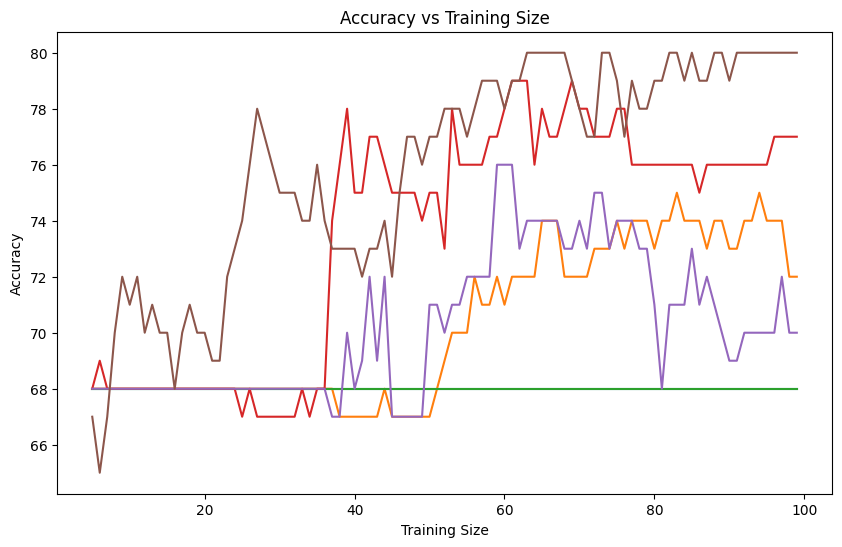

In [6]:
import matplotlib.pyplot as plt

#I'm assuming you left this code here so that we could fix that indentation bug.
instances_tr = read_data(train_file)
instances_te = read_data(test_file)
tr_percent = range(5,100,1) # percent of the training dataset to train with
num_epochs = range(5,100,50)     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

fig, ax = plt.subplots(figsize=(10, 6))

for lr in lr_array:
  for epochs in num_epochs:
    accuracies = []
    for tr_size in tr_percent:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      accuracies.append(accuracy)
    ax.plot(tr_percent, accuracies)

ax.set_xlabel("Training Size")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Training Size")

I think that line that never goes anywhere is when it trains with 5 epochs, because those all seem to have 68% accuracy.

A. For the most part, the scores increase when you increase the training size. Also, the highest accuracies have the highest training size, so in order to get those scores, you'd need more of the training set. There are some models that could get an 80% score using 70% of the data, however, cherry picking that model would make the test set lose its meaning. Since we tried too many parameters for the test set, now we need another test set to make sure that it is actually accurate, or if we now overfit to the old test set.

B. When the training set is small, adding a little extra data that doesn't represent the training set will have a large impact. Deep learning (actually, it's kinda shallow learning because there's only one layer) will try to entirely code all of the nuance into the model, so the model will try to generalize the labels of outliers to other similar data. With more data, the model could figure out that it is an outlier, or at least carve a little section just for that one data point.

C. Lemme try:

In [7]:
size =  round(len(instances_tr))
pre_instances = instances_tr[0:size]
weights = train_perceptron(pre_instances, .001, 100000)
accuracy = get_accuracy(weights, instances_te)
print(f"epochs: 10000, learning rate: .001; "
    f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

epochs: 10000, learning rate: .001; Accuracy (test, 100 instances): 80.0


Darn it.

I also tried a bunch of other hyperparameters. Maybe some of the testing data needs an extra layer to capture some nuance from the training data. There also could be some points that simply can't be explained using the training data. If there was more data, maybe it would do better, but if the problem ends up being super non-linear, then maybe extra data wouldn't help without adding more weights.

D. If your model is large and complex, then training for more epochs can hurt testing accuracy. More epochs can lead to overfitting to the training data. However, if you have some source of unlimited new training data, then it wouldn't hurt to keep training indefinitely (although there isn't anymore "epochs" anymore, because there's no end to the data).

Also, I have to point out the obvious problem, which is training time. After a while, the performance will plateu (assuming a finite dataset), so at some point it is a good idea to go back to the drawing board and change some hyperparameters or even the entire design of your model.